<a href="https://colab.research.google.com/github/yihong1011/TibameML/blob/main/06_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# tensorflow 2:
# a. keras已經是一份子
# b. gpu會直接辨別(cuda/cudnn還是要裝), 不需要安裝tensorflow-gpu
# c. eager mode(不用起tf.session就可以測試圖)
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [27]:
import pandas as pd
import random
c = random.randint(0,27)
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,253,255,63,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,244,251,253,62,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,251,251,253,62,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,236,251,211,31,8,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,228,251,251,94,0,0,0,0,0,0,0,0


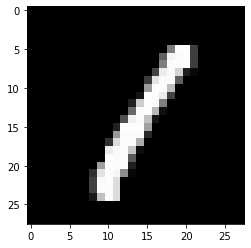

In [28]:
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.imshow(x_train[c], cmap="gray")

In [29]:
# keras有兩種建立模型的方式
# a. Sequentital: 一層疊再一層的上面(限制比較大)
# b. Model: 每一層可以是任何形式去做(自由)
from keras.models import Sequential
# Dense(全連接層 Fully-Connected)
from keras.layers import Dense
# 設定每層要幹嘛
layers = [
    Dense(128, activation="relu", input_dim=784),
    Dense(10, activation="softmax")
]
# 建立模型(帶入layer)
model = Sequential(layers)
model.summary()
# Param(參數) = 本層輸出所使用的weight(權重參數)數量 + 本次激活函式數量的bias(偏移參數)
# 784*128+128=100480
# 128*10+10=1290

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 輸出一個神經元(二元分類): BinaryCrossEntropy plog(1/q) + (1-p)log(1/1-q)
# 輸出多個神經元: CategoricalCrossEntropy p1log(1/q1) + p2log(1/q2)......
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [37]:
# 資料預處理
# 對答案做 one_hot_encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [50]:
# 對題目做攤開
x_train.shape
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0
x_test_norm.shape

(10000, 784)

In [52]:
pd.DataFrame(x_train_norm[c])

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
779,0.0
780,0.0
781,0.0
782,0.0
